In [4]:
import pandas as pd
import requests
import gender_guesser.detector as gender
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [5]:
# les deux listes suivantes representent le taux de change entre EUROS et Dollards et Livre sterligns et Dollards en fonction de l'années, 
# le i eme element représente l'année 2024-i
convertionEUR_USD=[1.04, 1.05, 1.05, 1.18, 1.14, 1.12, 1.18, 1.13, 1.11, 1.09, 1.3, 1.33, 1.29, 1.39, 1.33, 1.39, 1.47, 1.37, 1.25, 1.18, 1.24, 1.13, 0.95, 0.88, 0.93, 1.06, 1.13, 1.17, 1.22, 1.25, 1.28, 1.3, 1.34, 1.35, 1.55, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.2, 0.2, 0.2, 0.2, 0.2, 0.21, 0.21, 0.21, 0.21, 0.21, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193]
convertionGBP_USD=[1.25, 1.24, 1.22, 1.38, 1.29, 1.3, 1.33, 1.29, 1.35, 1.53, 1.65, 1.56, 1.57, 1.6, 1.55, 1.6, 1.85, 2.0, 1.88, 1.8, 1.83, 1.63, 1.46, 1.43, 1.5, 1.6, 1.63, 1.64, 1.56, 1.55, 1.53, 1.52, 1.54, 1.74, 1.79, 1.78, 1.73, 1.8, 1.56, 1.3, 1.26, 1.31, 1.83, 1.93, 1.92, 1.83, 1.67, 1.62, 1.65, 1.61, 1.83, 2.47, 2.51, 2.62, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 4.03, 4.03, 4.03, 4.03, 4.03, 4.03, 4.03, 4.86, 4.86, 4.86, 4.86, 4.86, 4.86, 4.86, 4.86, 4.86, 4.86, 4.86, 4.86, 4.86, 4.86, 4.86, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.75, 4.75, 4.75, 4.75, 4.75, 4.75, 4.86, 4.86, 4.86, 4.86, 4.86]
#la liste suivante reprensete la valeur actualiser d'un dollars. le i éme élément est la valeur d'un dollars de 2024-i en dollars de 2024
inflation_USD=[1,1.021, 1.044, 1.077, 1.122, 1.138, 1.164, 1.192, 1.217, 1.233, 1.234, 1.254, 1.273, 1.299, 1.341, 1.362, 1.357, 1.408, 1.449, 1.496, 1.546, 1.588, 1.625, 1.651, 1.697, 1.755, 1.793, 1.822, 1.853, 1.914, 1.968, 2.019, 2.079, 2.142, 2.232, 2.352, 2.465, 2.566, 2.659, 2.688, 2.782, 2.902, 2.994, 3.177, 3.504, 3.977, 4.423, 4.759, 5.068, 5.357, 5.845, 6.488, 6.89, 7.11, 7.416, 7.846, 8.333, 8.691, 8.952, 9.22, 9.368, 9.49, 9.603, 9.7, 9.806, 9.953, 10.053, 10.324, 10.634, 10.73, 10.762, 10.816, 11.67, 11.822, 11.704, 12.652, 14.474, 15.675, 16.036, 16.308, 17.287, 19.171, 20.206, 19.944, 19.944, 19.385, 20.083, 20.364, 20.975, 21.709, 20.602, 18.48, 16.761, 15.689, 14.685, 14.685, 14.523, 14.349, 14.421, 14.709, 14.547, 14.547, 15.449, 13.827, 11.643, 13.366, 15.771, 18.5, 19.961, 19.742, 19.426, 19.426, 19.756, 19.559, 19.559]


In [6]:
#chargement de la base de donnée
df = pd.read_excel('scrapping_film_vf.xlsx')

In [7]:
# netoyage des données
#seletion des variables d'interrets

df_clean=df[["titre","Presse", "Spectateurs","Realisateur","genre","acteur","durée","Nationalité","Récompense","Année de production","Date de sortie DVD","Date de sortie Blu-ray","Date de sortie VOD","Box Office France","Budget","Couleur","Récompenses", "Nationalités"]]

In [8]:
#convertir la durée du film en minute
def convertion_durée(durée):
    if durée==None: # on verifie que la donnée n'est pas absente
        return None
    h = 0
    min = 0
    if 'h ' in str(durée):
        h = int(durée.split('h')[0].strip())  # Extraire l'heure
    if 'min' in str(durée):
        min = int(durée.split('h')[-1].replace('min', '').strip())  # Extraire les minutes
    
    # Calculer le total en minutes
    total_minutes = h * 60 + min
    return total_minutes

In [9]:
infos_manquante_duée_avant=df_clean["durée"].isna().sum()

# Appliquer la fonction sur chaque ligne du DataFrame
df_clean["durée"]=df_clean["durée"].apply(convertion_durée)

# on verifie qu'on ne perd pas d'information dans la transformation en comparant les bases de données avant et apres.
infos_manquante_durée_apres=df_clean["durée"].value_counts().get('-', 0)
perte=(infos_manquante_durée_apres-infos_manquante_duée_avant)*100/df_clean.shape[0]
print("la perte d'information concernant la tranformation du champ durée est de "+str(perte)+" point de pourcentage")

la perte d'information concernant la tranformation du champ durée est de -63.12277710825666 point de pourcentage


C:\Users\cleme\AppData\Local\Temp\ipykernel_3832\3059159174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["durée"]=df_clean["durée"].apply(convertion_durée)


In [10]:
#savoir si un film a été realisé dans plusieurs pays
def compte_nationalité(ligne):
    nationalités = []

    # Vérifier si 'Nationalité' existe et n'est pas vide
    if pd.notna(ligne["Nationalité"]) and "inconnue" not in ligne["Nationalité"]:
        nationalités.extend(ligne["Nationalité"].split(','))

    # Vérifier si 'Nationalités' existe et n'est pas vide
    if pd.notna(ligne["Nationalités"]) and "inconnue" not in ligne["Nationalités"]:
        nationalités.extend(ligne["Nationalités"].split(','))

    # Si aucune nationalité n'a été trouvée, retourner None
    if len(nationalités) == 0:
        return None

    # Retourner le nombre unique de nationalités
    return len(set(nationalités))

# Appliquer la fonction sur chaque ligne du DataFrame
df_clean["nombre nationalités"] = df_clean.apply(compte_nationalité, axis=1)

C:\Users\cleme\AppData\Local\Temp\ipykernel_3832\1670843312.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["nombre nationalités"] = df_clean.apply(compte_nationalité, axis=1)


In [11]:
# estimer si un film a recu des recompenses ou des nominations
def compte_nominations(ligne):
    nombre_prix=0
    nombre_nominations=0
    if pd.notna(ligne["Récompenses"]):
        texte=ligne["Récompenses"].split(" ")
        if "nomination" in ligne["Récompenses"]:
            nombre_nominations = int(texte[-2].strip())  # Récupérer l'avant-dernière valeur comme etant le nombre de nominations
        if "pri"in ligne["Récompenses"]:
            if "#" in ligne["Récompenses"]: # on fait attention aux cas ou 1 seul prix est attribué prensent sous la forme #prix dans la base de donnée
                nombre_prix= 1
                nombre_nominations+=1 # pour recevoir un prix faut avoir été nominé
            else:
                nombre_prix = int(texte[0].strip())  # Récupérer la première valeur comme etant le nombre de prix
                nombre_nominations+=nombre_prix # pour recevoir un prix faut avoir été nominé
        return nombre_prix, nombre_nominations
    elif pd.notna(ligne["Récompense"]):
        texte=ligne["Récompense"].split(" ")
        if "nomination" in ligne["Récompense"]:
            nombre_nominations = int(texte[-2].strip())  # Récupérer l'avant-dernière valeur comme etant le nombre de nominations
        if "pri"in ligne["Récompense"]:
            nombre_prix = 1  # Récupérer la première valeur comme etant le nombre de prix
            nombre_nominations+=1 # pour recevoir un prix faut avoir été nominé
        return int(nombre_prix), int(nombre_nominations)
    return 0,0

# Appliquer la fonction sur chaque ligne du DataFrame
df_clean["prix"], df_clean["nominations"] = zip(*df_clean.apply(compte_nominations, axis=1))

C:\Users\cleme\AppData\Local\Temp\ipykernel_3832\2206058096.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["prix"], df_clean["nominations"] = zip(*df_clean.apply(compte_nominations, axis=1))
C:\Users\cleme\AppData\Local\Temp\ipykernel_3832\2206058096.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["prix"], df_clean["nominations"] = zip(*df_clean.apply(compte_nominations, axis=1))


In [12]:
# estimer si un film à été commercialiser en dehors du cinema

def commercialisation(ligne):
    if pd.notna(ligne["Date de sortie VOD"]) or  pd.notna(ligne["Date de sortie DVD"]) or  pd.notna(ligne["Date de sortie Blu-ray"]): #Vérifier si le film a été commercialiser
        if ligne["Date de sortie VOD"]!="-" or  ligne["Date de sortie DVD"]!="-" or  ligne["Date de sortie Blu-ray"]!="-" :
            return 1
        return 0

# Appliquer la fonction sur chaque ligne du DataFrame
df_clean["commercialiser"] = df_clean.apply(commercialisation, axis=1)

C:\Users\cleme\AppData\Local\Temp\ipykernel_3832\513321746.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["commercialiser"] = df_clean.apply(commercialisation, axis=1)


In [13]:
# recupération de tous les genres de films

genres=[]
for i in range (df_clean.shape[0]): # visiter toutes les lignes
    texte=df_clean.loc[i,"genre"]
    if pd.notna(texte) :            # verifier que l'information sur le genre est non nuls
        texte_split=texte.split(",")
        for j in texte_split :      # on regarde chaque genre du film
            j = j.strip()           
            if j not in genres :
                genres.append(j)     # ajouter le genre a la liste s'il n'y etait pas
print(genres)

['Comédie', 'Comédie dramatique', 'Drame', 'Aventure', 'Animation', 'Famille', 'Thriller', 'Action', 'Péplum', 'Historique', 'Fantastique', 'Comédie musicale', 'Romance', 'Epouvante-horreur', 'Biopic', 'Musical', 'Science Fiction', 'Guerre', 'Policier', 'Espionnage', 'Western', 'Erotique', 'Arts Martiaux', 'Judiciaire', 'Expérimental', 'Bollywood', 'Évènement Sportif', 'Drama', 'Divers', 'Concert', 'Spectacle', 'Opéra']


In [14]:
#encoder les genres des films,  en créant une nouvelle colonne ne contenant que des  et des que genre pour chaque genre

for i in genres: # créer une colonne pour chaque genre dans notre data frame
    df_clean[i] = 0

def attribuer_genre(ligne):
    if pd.notna(ligne["genre"]): # verifier que l'information sur le genre est non nul
        texte=ligne.loc["genre"] 
        texte_split=texte.split(",")  # recupérer tous les genres du film
        for j in texte_split :
            j = j.strip()
            ligne[j] = 1 # mettre a 1 la colonne du genre j si le film est de genre j
    else : # Mettre a None les lignes ou on a pas d'infos
        for j in genres:
            ligne[j]=None
    return ligne
#on applique la fonction a chaque ligne pour mettre a 1 les colonnes du genre du film
df_clean=df_clean.apply(attribuer_genre, axis=1)

C:\Users\cleme\AppData\Local\Temp\ipykernel_3832\3412619251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[i] = 0
C:\Users\cleme\AppData\Local\Temp\ipykernel_3832\3412619251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[i] = 0
C:\Users\cleme\AppData\Local\Temp\ipykernel_3832\3412619251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [15]:
#compter le nombre d'actrice en tête d'affiche
# premiére methode en scrapant Wikipedia mais trop de pages à scraper 
def get_gender_from_wikipedia(ligne):
    if pd.notna(ligne["acteur"]):
        acteurs=ligne["acteur"].split(",")
        acteurs[0]=acteurs[0].replace("Avec", "")
        nombre_actrices=0
        for i in acteurs:
            acteur=i.strip()
            url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=extracts&titles={acteur}&exintro=1"
            response = requests.get(url)
            data = response.json()
            
            # Parcours des pages
            pages = data.get('query', {}).get('pages', {})
            for page_id, page in pages.items():
                if 'extract' in page:
                    extract = page['extract']
                    if "actor" in extract.lower() or "actress" in extract.lower():
                        if "actress" in extract.lower():
                            nombre_actrices += 1
                        break
                    else:
                        return None  # Si aucun sexe n'est trouvé

        return nombre_actrices
    return None

# on applique la fonction à chaque ligne du data frame
#df_clean["sex_acteur"] = df_clean.apply(get_gender_from_wikipedia, axis=1)

KeyboardInterrupt: 

In [16]:
# seconde méthode en utilisant un module python pour determiner le sex a partir du prenom des acteurs. Méthode moins exacte que la premiére mais plus rapide. 
# Initialiser le détecteur de sexe
d = gender.Detector()

# Fonction pour obtenir le sexe
def get_gender_acteur(ligne):
    if pd.notna(ligne["acteur"]): # verifier que l'information de la ligne concernant les acteurs est existente
        acteurs=ligne["acteur"].split(",")
        acteurs[0]=acteurs[0].replace("Avec", "")
        nombre_actrices=0
        for i in acteurs:
            prenom_acteur=i.strip().split(" ")# on conserve que le prenom de l'acteur
            sex=d.get_gender(prenom_acteur[0])
            if "female"in sex :
                nombre_actrices +=1
            elif "male" not in sex :
                return None
        return nombre_actrices
    return None

# Appliquer la fonction pour compter le nombre d'actrices de chaque films

df_clean["nombre_actrice"] = df_clean.apply(get_gender_acteur, axis=1)

In [18]:
# on calcul la perte d'info:
nombre_ligne_acteurs_None_avant_transformation=int(df_clean["acteur"].isna().sum())
nombre_ligne_acteurs_None_apres_transformation=int(df_clean["nombre_actrice"].isna().sum())
perte=(nombre_ligne_acteurs_None_apres_transformation-nombre_ligne_acteurs_None_avant_transformation)*100/df_clean.shape[0]
print("la perte d'information concernant la tranformation du champ genre des acteurs est de "+str(perte)+" points de pourcentages")

la perte d'information concernant la tranformation du champ genre des acteurs est de 10.51262455542165 points de pourcentages


In [19]:
#Savoir si le film posséde une réalisatrice
def get_gender_Realisateur(ligne):
    if pd.notna(ligne["Realisateur"]): # verifier que l'informationde la ligne concernant les réalisateurs est existente
        realisateurs=ligne["Realisateur"].split(",")
        realisateurs[0]=realisateurs[0].replace("De", "")
        sex_incertain= False
        for i in realisateurs:
            prenom_realisateur=i.strip().split(" ")# on conserve que le prenom du réalisateur
            sex=d.get_gender(prenom_realisateur[0])
            if "female" in sex :
                return 1
            elif sex == "andy" or sex== "unkonw":
                sex_incertain=True
        if sex_incertain : return None
        return 0
    return None

# Appliquer la fonction a chaque ligne pour savoir si le film posséde une realisatrice
df_clean["pressence_realisatrice"] = df_clean.apply(get_gender_Realisateur, axis=1)

In [20]:
# on calcul la perte d'info:
nombre_ligne_realisateurs_None_avant_transformation=int(df_clean["Realisateur"].isna().sum())
nombre_ligne_realisateurs_None_apres_transformation=int(df_clean["pressence_realisatrice"].isna().sum())
perte=(nombre_ligne_realisateurs_None_apres_transformation-nombre_ligne_realisateurs_None_avant_transformation)*100/df_clean.shape[0]
print("la perte d'information concernant la tranformation du champ genre des realisateurs est de "+str(perte)+" point de pourcentage")

la perte d'information concernant la tranformation du champ genre des realisateurs est de 0.5408424208577055 point de pourcentage


In [21]:
#transformer la colonne couleur en une colonne de 0 et 1, ou 1 represente la presence de couleur et 0 l'absence. 
def tranformation_couleur(ligne):
    if pd.notna(ligne["Couleur"]) and ligne["Couleur"]!="-":#on verifie qu'on a l'information sur la couleur du film
        if "ouleur" in ligne["Couleur"]: # si le film est en couleur on lui associe la valeur 1
            return 1
        return 0# sinon on lui attribu la valuer 0
    return None

infos_manquante_couleur_avant=df_clean["Couleur"].value_counts().get('-', 0)

# on applique la fonction a chaque ligne
df_clean["Couleur"]=df_clean.apply(tranformation_couleur, axis=1)

In [22]:
# on verifie qu'on ne perd pas d'information dans la transformation en comparant les bases de données avant et apres.
infos_manquante_couleur_apres=df_clean["Couleur"].isna().sum()
perte=(infos_manquante_couleur_apres-infos_manquante_couleur_avant)*100/df_clean.shape[0]
print("la perte d'information concernant la tranformation du champ Couleur est de "+str(perte)+" point de pourcentage")

la perte d'information concernant la tranformation du champ Couleur est de 0.008818082948766938 point de pourcentage


In [23]:
#mettre box office sous forme d'entier

def trensormation_box_office(ligne):
    if pd.notna(ligne["Box Office France"]) and ligne["Box Office France"]!="0 entrées" :# on verifie qu'on posséde l'information sur le box office
        nombre_entrées=ligne["Box Office France"].strip().split(" ") # on recupére le nombre d'entrées
        nombre_entrées=nombre_entrées[:-1] # on selectionne uniquemmentle chiffre
        nombre_entrées=int("".join(nombre_entrées)) # on le converti en entier
        return nombre_entrées
    return None

infos_manquante_Box_Office_avant=df_clean["Box Office France"].isna().sum()

# on applique la fonction a chaque ligne
df_clean["Box Office France"]=df_clean.apply(trensormation_box_office, axis=1)

In [24]:
# on verifie qu'on ne perd pas d'information dans la transformation en comparant les bases de données avant et apres.
infos_manquante_Box_Office_apres=df_clean["Box Office France"].isna().sum()
perte=(infos_manquante_Box_Office_apres-infos_manquante_Box_Office_avant)*100/df_clean.shape[0]
print("la perte d'information concernant la tranformation du champ Box Office en France est de "+str(perte)+" point de pourcentage")


la perte d'information concernant la tranformation du champ Box Office en France est de 0.041151053760912375 point de pourcentage


In [25]:
#normaliser les budgets sur la même monnaie
def convertion_monetaire(ligne):
    if pd.notna(ligne["Budget"]) and ligne["Budget"]!="-" and pd.notna(ligne["Année de production"]):
        texte=ligne["Budget"].strip()
        unité=texte[-3:]
        if unité not in ["USD", "EUR", "GBP"]:
            if pd.notna(ligne["Nationalité"]) or pd.notna(ligne["Nationalités"]):
                nationalité=str(ligne["Nationalité"])+str(ligne["Nationalités"])
                
                if "U.S.A." in nationalité or "Australie" in nationalité or "Canada" in nationalité:
                    unité="USD"
                    taux_change=inflation_USD[int(2024-ligne["Année de production"])]
                elif "France" in nationalité or "Allemagne" in nationalité or "Danemark" in nationalité or "Belgique" in nationalité or "Suède" in nationalité :
                    unité="EUR"
                    taux_change=inflation_USD[int(2024-ligne["Année de production"])]*convertionEUR_USD[int(2024-ligne["Année de production"])]
                elif "Grande-Bretagne" in nationalité:
                    unité="GBP"
                    taux_change=inflation_USD[int(2024-ligne["Année de production"])]*convertionGBP_USD[int(2024-ligne["Année de production"])]
                else:
                    return None
            else:
                return None
        else:
            texte=texte[:-3]
            if unité == "USD":
                taux_change=inflation_USD[int(2024-ligne["Année de production"])]
            elif unité == "EUR":
                taux_change=inflation_USD[int(2024-ligne["Année de production"])]*convertionEUR_USD[int(2024-ligne["Année de production"])]
            elif unité== "GBP" :
                taux_change=inflation_USD[int(2024-ligne["Année de production"])]*convertionGBP_USD[int(2024-ligne["Année de production"])]
        if "." in texte:
            texte=texte.replace(".", " ")
        montant=int(texte.replace(" ", ""))
        if montant==0:
            return None
        return int(round(taux_change*montant,0))
    return None
infos_manquante_Budget_avant=df_clean["Budget"].value_counts().get('-', 0)

# on applique la fonction a chaque ligne
df_clean["Budget"]=df_clean.apply(convertion_monetaire, axis=1)

In [26]:
# on verifie qu'on ne perd pas d'information dans la transformation en comparant les bases de données avant et apres.
infos_manquante_Budget_apres=df_clean["Budget"].isna().sum()
perte=(infos_manquante_Budget_apres-infos_manquante_Budget_avant)*100/df_clean.shape[0]
print("la perte d'information concernant la tranformation du champ Budget est de "+str(perte)+" point de pourcentage")

la perte d'information concernant la tranformation du champ Budget est de 0.1043473148937421 point de pourcentage


In [27]:
# aplliquer une transformation logaritmique au Budget et au Box office

# Appliquer une transformation logarithmique sur Budget
df_clean["log_Budget"] = np.log(df_clean["Budget"])

# Appliquer une transformation logarithmique sur Box Office France
df_clean["log_Box Office France"] = np.log(df_clean["Box Office France"])

In [28]:
#transformer des colonnes de float en int
df_clean["Année de production"]=df_clean["Année de production"].astype('Int64')
df_clean["nombre nationalités"]=df_clean["nombre nationalités"].astype('Int64')
df_clean["commercialiser"]=df_clean["commercialiser"].astype('Int64')
df_clean["Opéra"]=df_clean["Opéra"].astype('Int64')
df_clean["nombre_actrice"]=df_clean["nombre_actrice"].astype('Int64')
df_clean["pressence_realisatrice"]=df_clean["pressence_realisatrice"].astype('Int64')

print(df_clean["Thriller"].isna().sum())
#supprimer les colonnes dont on a plus besoin
df_clean.drop(columns=["Box Office France","Budget","genre","Realisateur","acteur","Nationalité","Récompense","Date de sortie DVD","Date de sortie Blu-ray","Date de sortie VOD","Couleur","Récompenses", "Nationalités"], inplace=True)

43307


In [29]:
#afficher les 5 premiéres lignes
print("voici les 5 premiéres lignes de la data frame netoyer")
print(df_clean.head())

voici les 5 premiéres lignes de la data frame netoyer
                               titre  Presse  Spectateurs  durée  \
0                          En fanfar     3.8          4.3    104   
1                            Vaiana      3.0          3.6    100   
2                            Cónclav     3.5          3.8    120   
3                        Gladiator I     3.1          3.5    148   
4  La Plus Précieuse Des Marchandise     4.0          4.2     81   

   Année de production  nombre nationalités  prix  nominations  \
0                 2024                    1     0            1   
1                 2024                    1     0            1   
2                 2024                    1     0            6   
3                 2024                    2     0            2   
4                 2024                    2     0            5   

   commercialiser  Comédie  ...  Évènement Sportif  Drama  Divers  Concert  \
0               0      1.0  ...                0.0    0.0     

In [30]:
# afficher les infos relative aux colonnes
print("les informations concernant les types et le nombre de valeurs non nuls de chaque colonnes sont les suivantes")
print(df_clean.info())
print("les informations concernant l'analyse statistique de chaque colonnes sont les suivantes")
print(df_clean.describe().round(2).transpose())
print("Pour chaque colonne voici le pourcentage d'informations manquantes")
print(df_clean.isnull().mean() * 100)

les informations concernant les types et le nombre de valeurs non nuls de chaque colonnes sont les suivantes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68042 entries, 0 to 68041
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   titre                   67904 non-null  object 
 1   Presse                  13864 non-null  float64
 2   Spectateurs             68028 non-null  float64
 3   durée                   68042 non-null  int64  
 4   Année de production     66629 non-null  Int64  
 5   nombre nationalités     63018 non-null  Int64  
 6   prix                    68042 non-null  int64  
 7   nominations             68042 non-null  int64  
 8   commercialiser          68037 non-null  Int64  
 9   Comédie                 24735 non-null  float64
 10  Comédie dramatique      24735 non-null  float64
 11  Drame                   24735 non-null  float64
 12  Aventure                24735 non-n

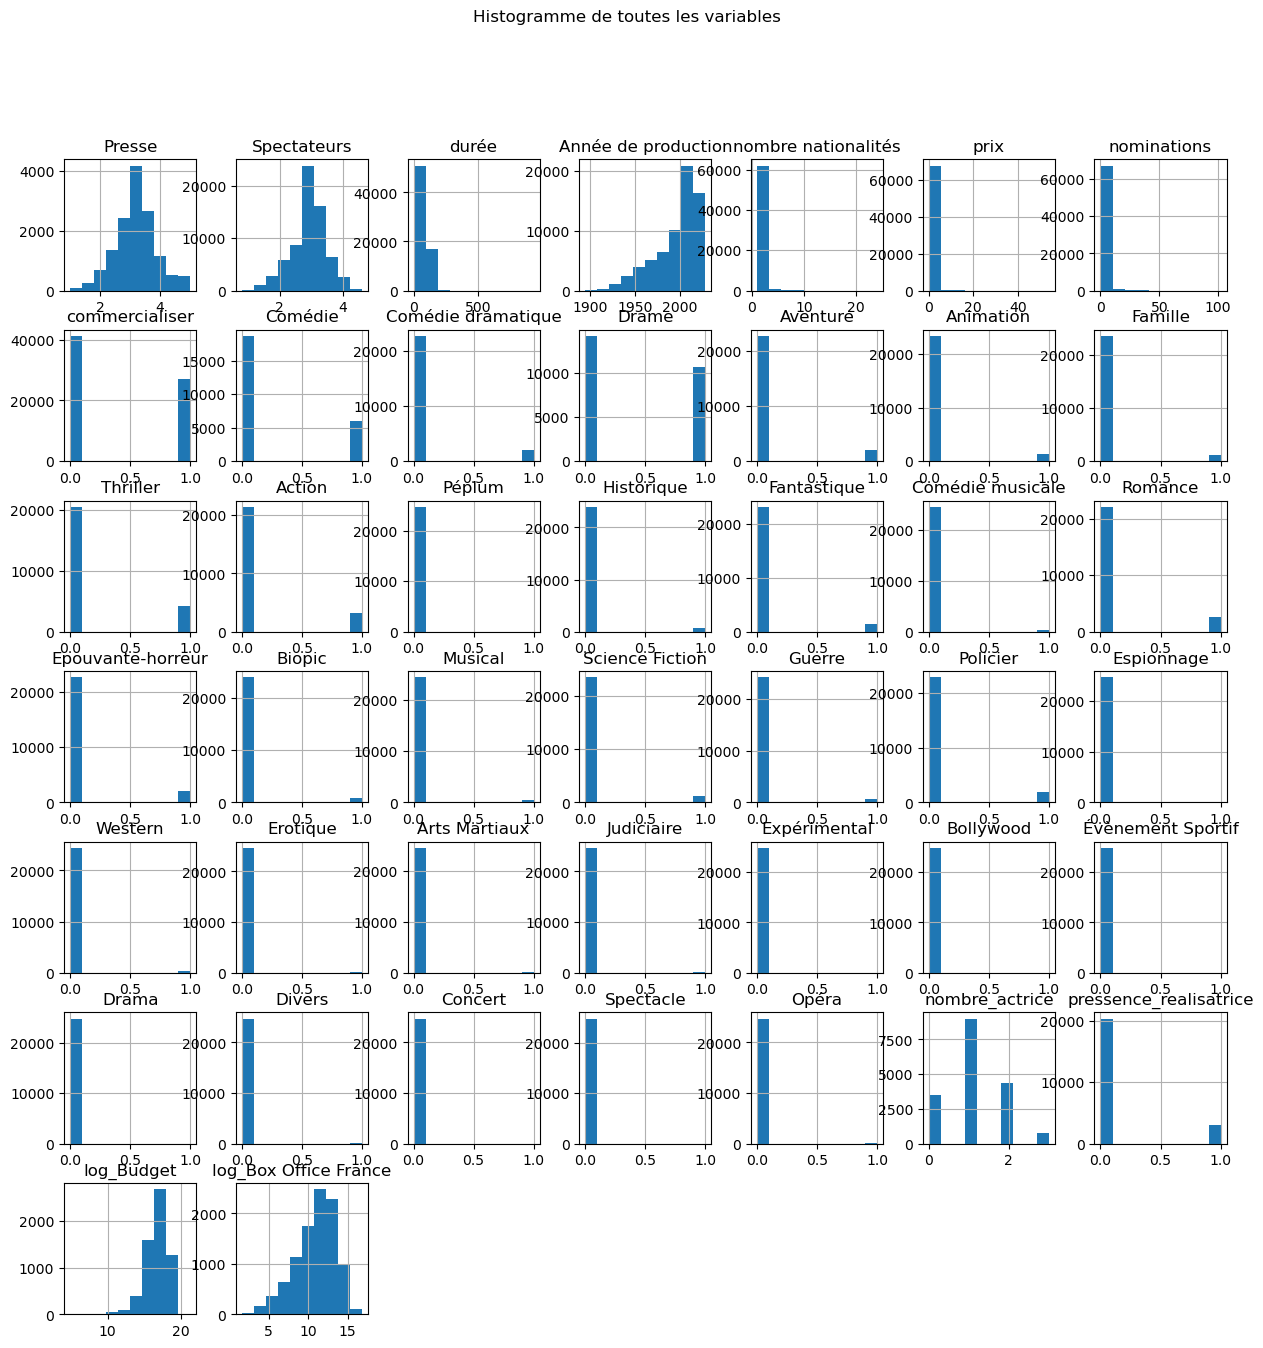

In [31]:
# visualisation des repartitions de nos variables sous forme d'histogramme 
df_clean.hist(figsize=(15, 15))
plt.suptitle("Histogramme de toutes les variables")
plt.show()

In [32]:
# standardiser les variables
scaler = StandardScaler()
variables_a_normaliser=["nombre nationalités","Presse","Spectateurs","durée","Année de production","log_Box Office France","log_Budget","prix","nominations","nombre_actrice"]
df_clean_standardized = df_clean.copy(deep=True)
df_clean_standardized[variables_a_normaliser]=scaler.fit_transform(df_clean_standardized[variables_a_normaliser])
print("les valeurs une fois standardiser prennent la forme suivante")
print(df_clean_standardized.describe())

les valeurs une fois standardiser prennent la forme suivante
             Presse   Spectateurs         durée  Année de production  \
count  1.386400e+04  6.802800e+04  6.804200e+04         6.662900e+04   
mean   6.778575e-16 -6.166644e-16  1.370083e-16         3.187306e-15   
std    1.000036e+00  1.000007e+00  1.000007e+00         1.000008e+00   
min   -3.086441e+00 -3.847021e+00 -7.289116e-01        -4.198523e+00   
25%   -5.493844e-01 -5.664413e-01 -7.289116e-01        -5.475031e-01   
50%    1.440585e-02  1.625764e-01 -7.289116e-01         3.652520e-01   
75%    5.781961e-01  5.270852e-01  1.081138e+00         7.386518e-01   
max    2.551462e+00  3.078647e+00  1.737158e+01         1.319496e+00   

       nombre nationalités          prix   nominations  commercialiser  \
count         6.301800e+04  6.804200e+04  6.804200e+04         68037.0   
mean          2.255047e-17 -1.420208e-17 -4.344167e-17        0.395505   
std           1.000008e+00  1.000007e+00  1.000007e+00        0.4889

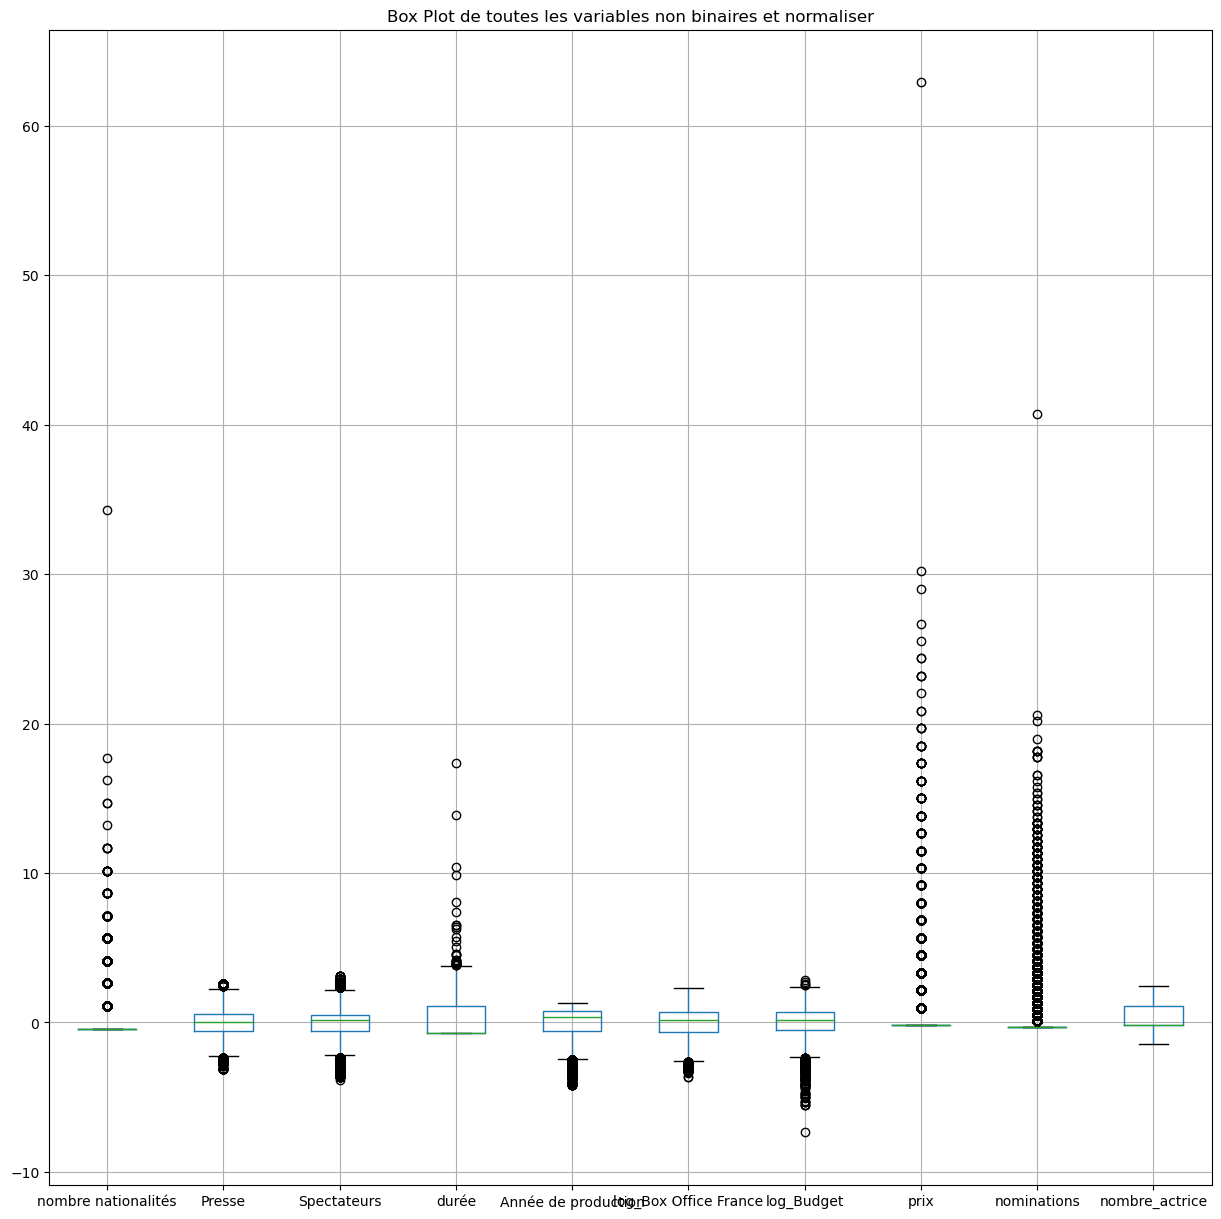

In [33]:
# visualisation des repartitions de nos variables sous forme de boxplot 
plt.figure(figsize=(15, 15))  
df_clean_standardized[variables_a_normaliser].boxplot()
plt.title("Box Plot de toutes les variables non binaires et normaliser")
plt.show()

In [34]:
# Calcul de l'IQR pour chaque colonne numérique
df_clean_standardized_cut=df_clean_standardized.drop(["titre"],axis=1)
Q1 = df_clean_standardized_cut.quantile(0.25)
Q3 = df_clean_standardized_cut.quantile(0.75)
IQR = Q3 - Q1

# Détection des outliers
outliers = (((df_clean_standardized_cut) < (Q1 - 1.5 * IQR)) | ((df_clean_standardized_cut) > (Q3 + 1.5 * IQR))).sum()
print("le nombre d'oulier poour chaque variable est de")
print(outliers)

le nombre d'oulier poour chaque variable est de
Presse                      488
Spectateurs                2287
durée                        34
Année de production        1815
nombre nationalités       11831
prix                       5189
nominations               15236
commercialiser                0
Comédie                    6051
Comédie dramatique         2010
Drame                         0
Aventure                   2070
Animation                  1381
Famille                    1146
Thriller                   4248
Action                     3287
Péplum                       23
Historique                  802
Fantastique                1511
Comédie musicale            267
Romance                    2660
Epouvante-horreur          2109
Biopic                      833
Musical                     423
Science Fiction            1288
Guerre                      614
Policier                   1887
Espionnage                  164
Western                     358
Erotique                

In [35]:
# pour nos variables catégoriels, on peut afficher la répartition au sein de chaque catégorie
valeurs_catégoriels=["prix","nominations","nombre_actrice", "nombre nationalités"]

for i in valeurs_catégoriels:
    # Fréquence des valeurs dans une colonne catégorielle
    print("la fréquence d'apparition des valeurs dans la colonne "+i+" est la suivante")
    print(df_clean[i].value_counts(dropna=True))

    # Pourcentage de chaque catégorie
    print("le pourcentage d'apparition des valeurs dans la colonne "+i+" est la suivante")
    print(df_clean[i].value_counts(dropna=True,normalize=True) * 100)

la fréquence d'apparition des valeurs dans la colonne prix est la suivante
prix
0     62853
1      3482
2       740
3       316
4       192
5       121
6        85
7        62
8        38
10       34
9        29
11       20
12       15
13       13
14       10
15        9
16        6
17        4
20        3
21        2
18        2
23        1
26        1
22        1
54        1
19        1
25        1
Name: count, dtype: int64
le pourcentage d'apparition des valeurs dans la colonne prix est la suivante
prix
0     92.373828
1      5.117427
2      1.087564
3      0.464419
4      0.282179
5      0.177831
6      0.124923
7      0.091120
8      0.055848
10     0.049969
9      0.042621
11     0.029394
12     0.022045
13     0.019106
14     0.014697
15     0.013227
16     0.008818
17     0.005879
20     0.004409
21     0.002939
18     0.002939
23     0.001470
26     0.001470
22     0.001470
54     0.001470
19     0.001470
25     0.001470
Name: proportion, dtype: float64
la fréquence d'appariti

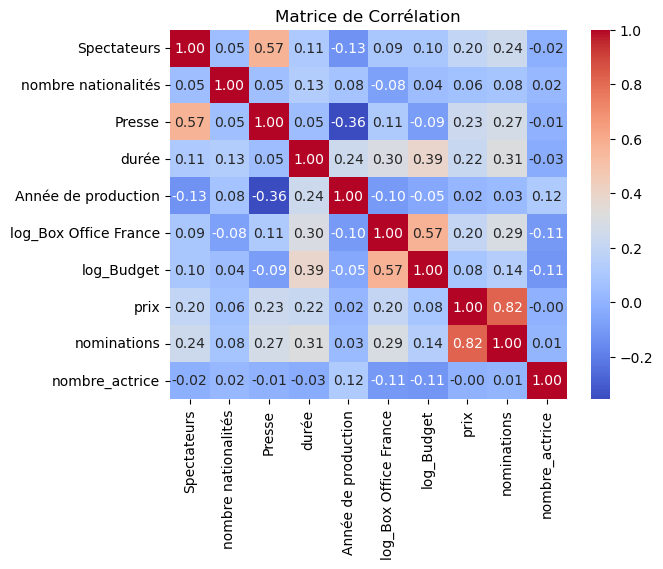

In [36]:
# Calcul de la matrice de corrélation des variables non binaires
variables_non_binaires=["Spectateurs","nombre nationalités","Presse","durée","Année de production","log_Box Office France","log_Budget","prix","nominations","nombre_actrice"]
correlation_matrix = df_clean_standardized[variables_non_binaires].corr()

# Affichage de la matrice de corrélation sous forme de heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

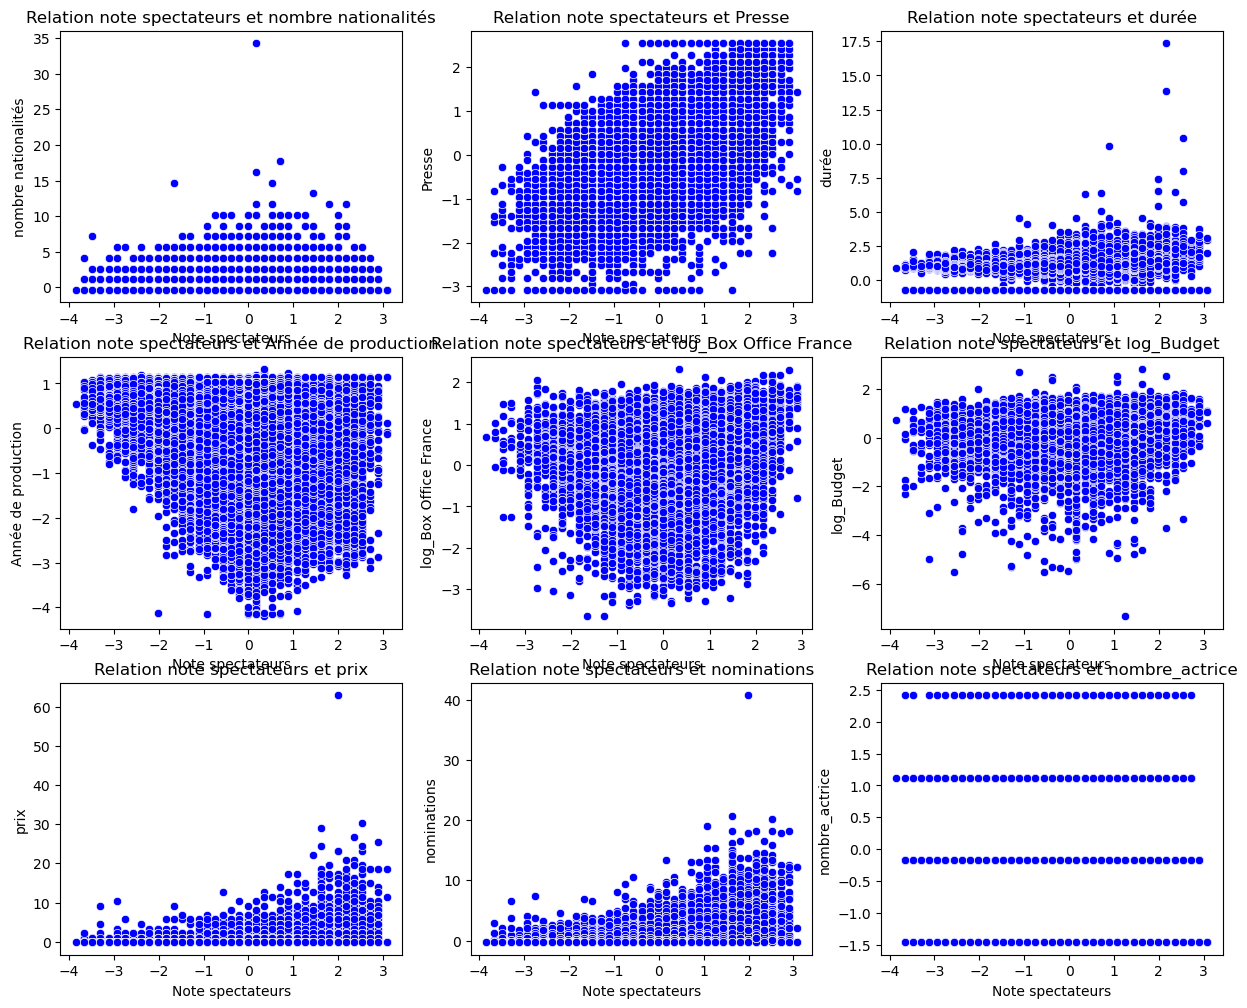

In [37]:
# representer la relation entre note Spectateur et autres variables non binaire
# on ce concentre sur ces variables par soucis de lisibilitées
columns_to_plot = ["nombre nationalités","Presse","durée","Année de production","log_Box Office France","log_Budget","prix","nominations","nombre_actrice"]

# Calculer le nombre de sous-graphes nécessaires
n_cols = 3  # Nombre de colonnes pour les graphes
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

# Créer la figure et les sous-graphes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

# Aplatir les axes pour les itérer facilement
axes = axes.flatten()

# Tracer chaque graphe
for i, col in enumerate(columns_to_plot):
    sns.scatterplot(x=df_clean_standardized["Spectateurs"], y=df_clean_standardized[col], ax=axes[i], color='blue')
    axes[i].set_title(f'Relation note spectateurs et {col}')
    axes[i].set_xlabel('Note spectateurs')
    axes[i].set_ylabel(col)

# Supprimer les axes inutilisés si le nombre de sous-graphes n'est pas un multiple de n_cols
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Afficher la figure
plt.show()

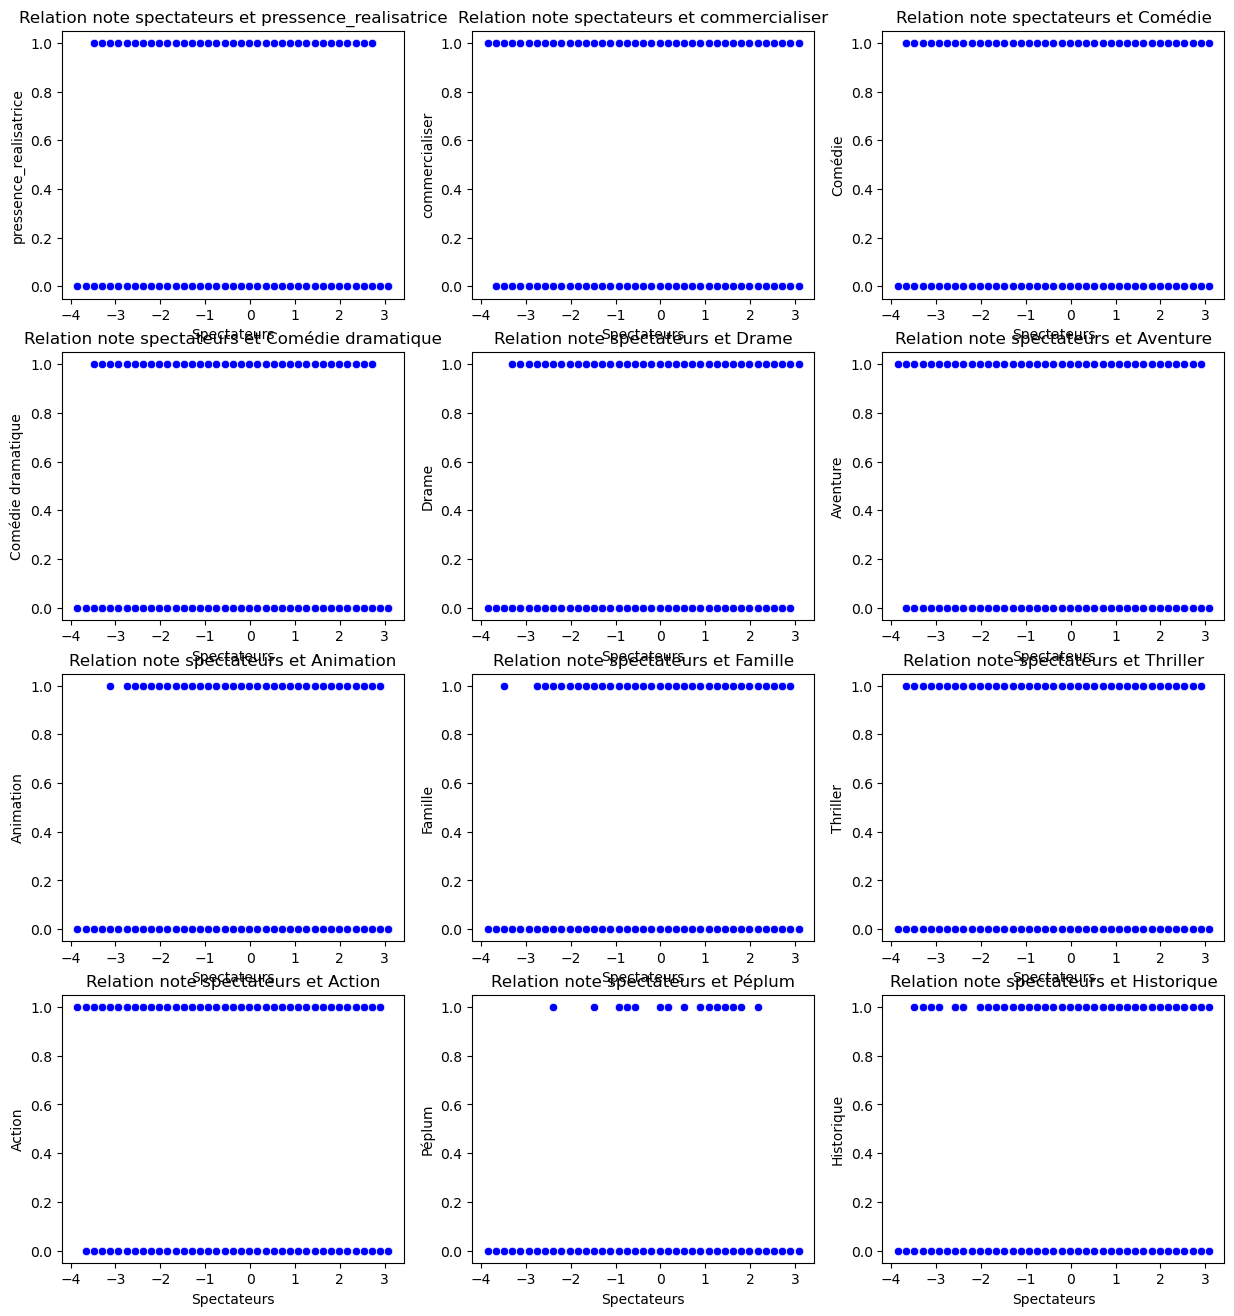

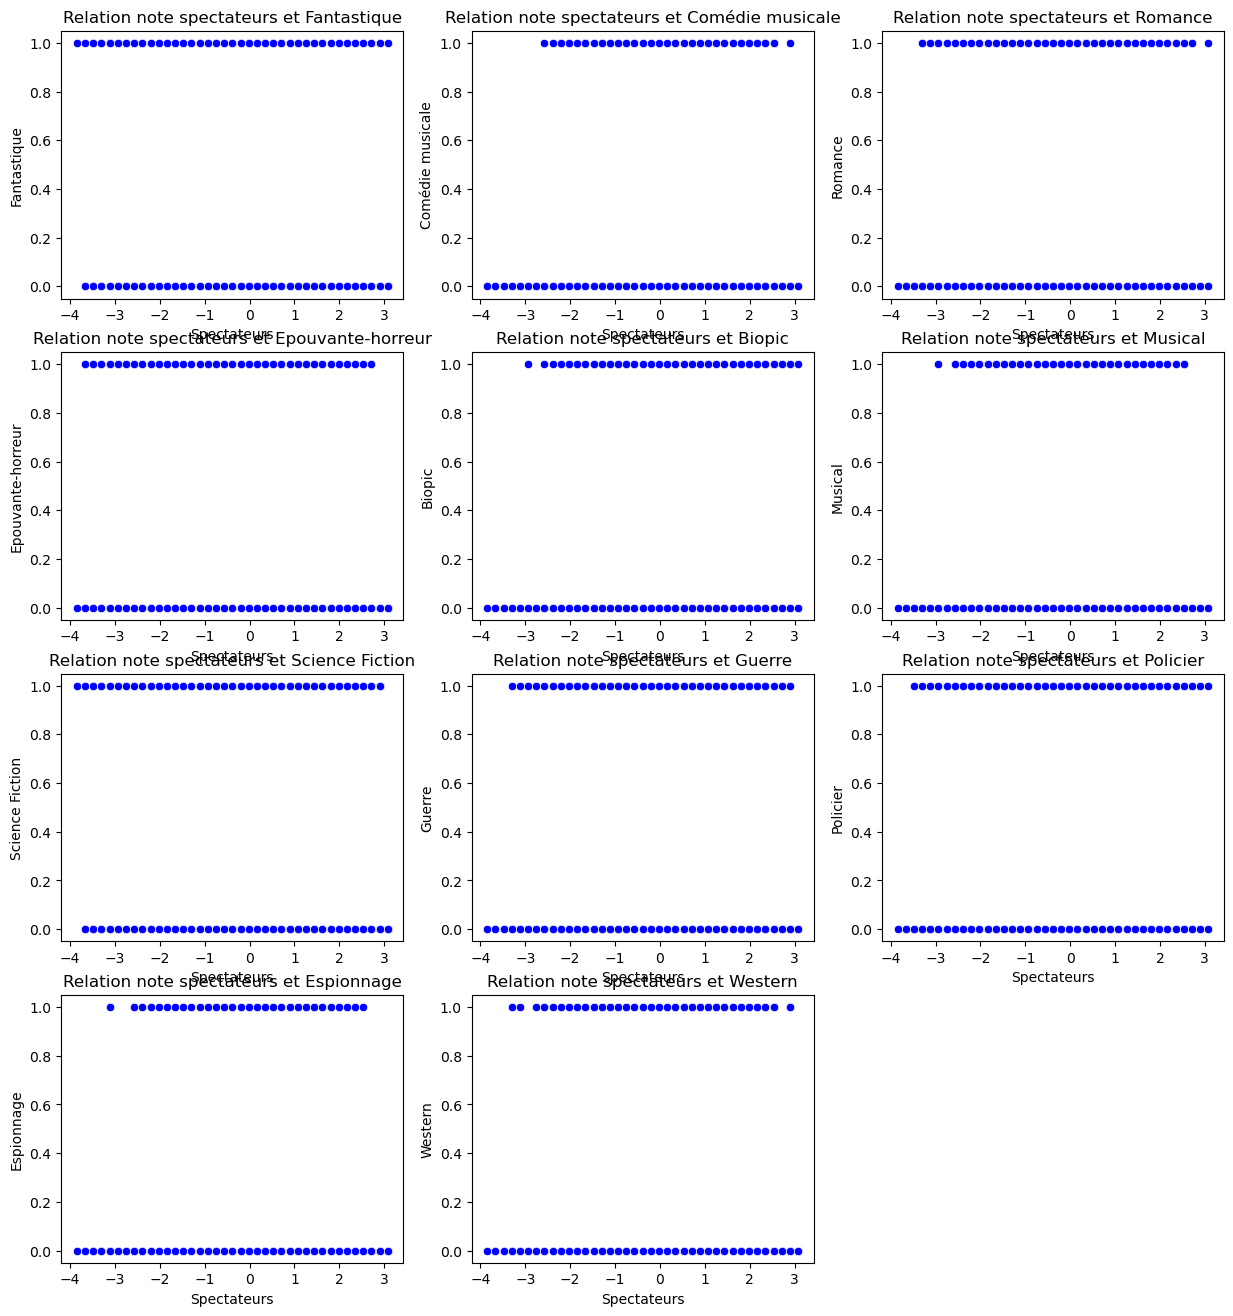

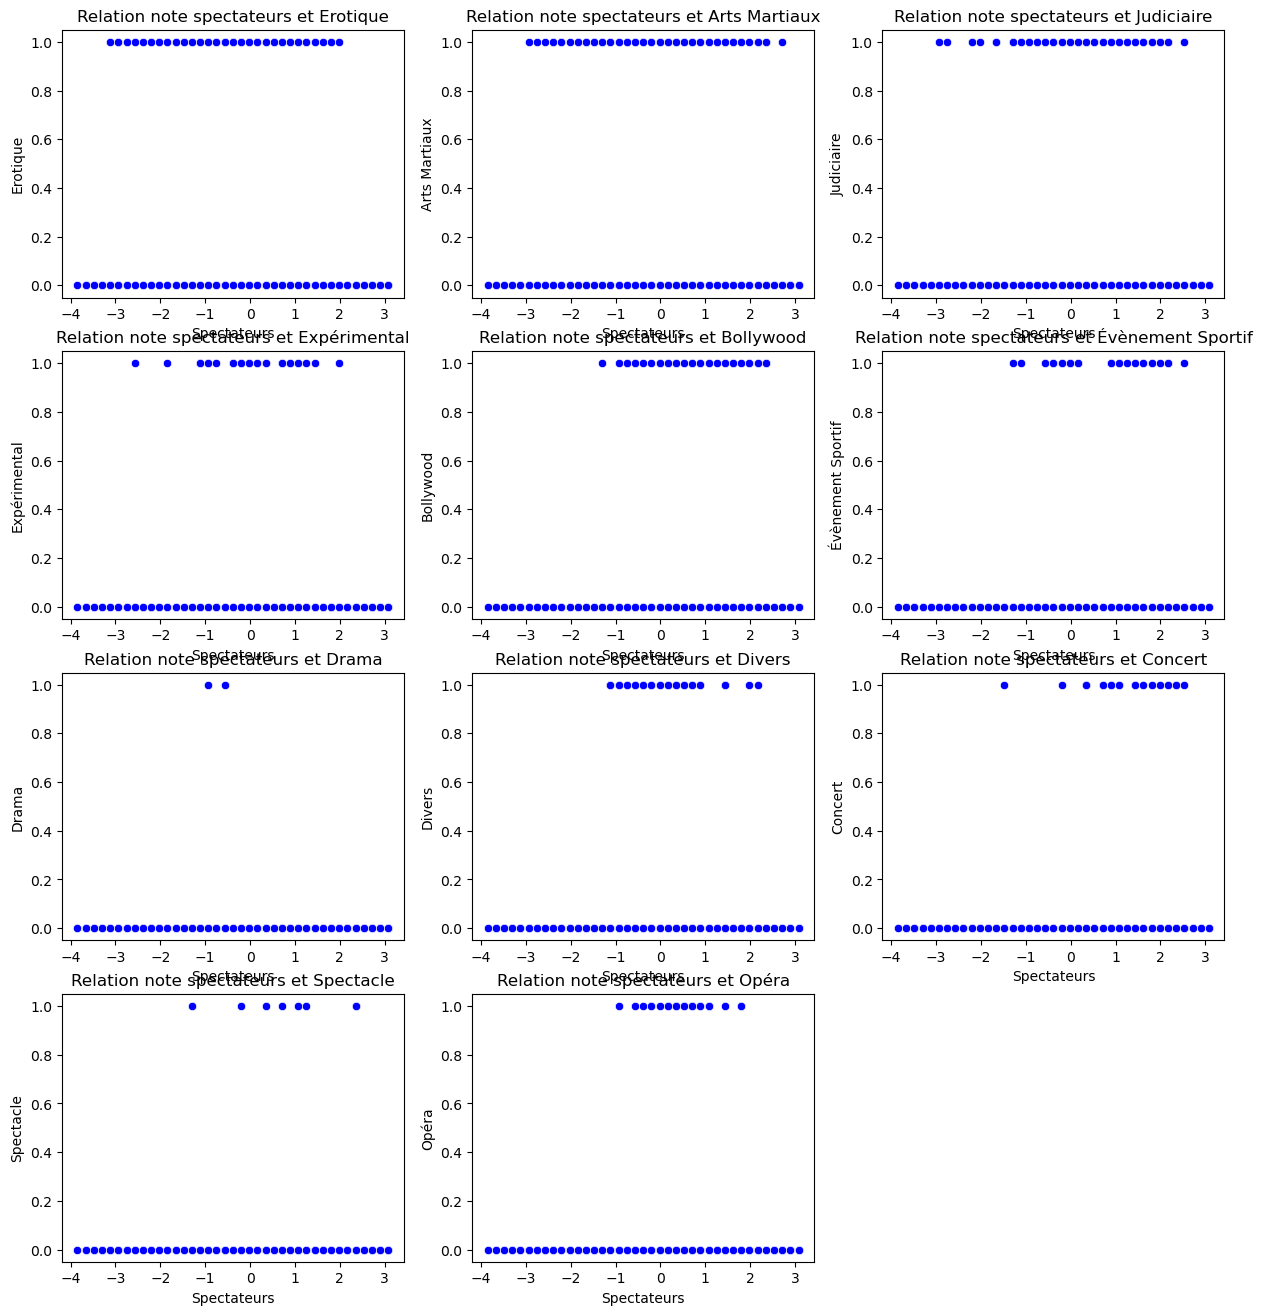

In [38]:
# representer la relation entre note Spectateur et autres variables binaires
columns_to_plot =['pressence_realisatrice','commercialiser','Comédie', 'Comédie dramatique', 'Drame', 'Aventure', 'Animation', 'Famille', 'Thriller', 'Action', 'Péplum', 'Historique', 'Fantastique', 'Comédie musicale', 'Romance', 'Epouvante-horreur', 'Biopic', 'Musical', 'Science Fiction', 'Guerre', 'Policier', 'Espionnage', 'Western', 'Erotique', 'Arts Martiaux', 'Judiciaire', 'Expérimental', 'Bollywood', 'Évènement Sportif', 'Drama', 'Divers', 'Concert', 'Spectacle', 'Opéra']

listes_decoupees = np.array_split(columns_to_plot, 3)

# Affichage des sous-listes
for lst in (listes_decoupees):
    # Calculer le nombre de sous-graphes nécessaires
    n_cols = 3  # Nombre de colonnes pour graphes
    n_rows = (len(lst) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

    # Créer la figure et les sous-graphes
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

    # Aplatir les axes pour les itérer facilement
    axes = axes.flatten()

    # Tracer chaques graphe
    for i, col in enumerate(lst):
        sns.scatterplot(x=df_clean_standardized["Spectateurs"], y=df_clean_standardized[col], ax=axes[i], color='blue')
        axes[i].set_title(f'Relation note spectateurs et {col}')
        axes[i].set_ylabel(col)

    # Supprimer les axes inutilisés si le nombre de sous-graphes n'est pas un multiple de n_cols
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Afficher la figure
    plt.show()


In [39]:
# on supprime les lignes ou le nombre ou avoir des None est genant

nombre_de_ligne_avant=df_clean.shape[0]

df_clean_complet= df_clean.dropna(subset=['Spectateurs', 'durée', 'Année de production', 'Comédie', 'log_Box Office France'])# on prend pas toute sles valeurs sinon on perd pressque integrallemnt la base de données et il reste moins de 2000 lignes, donc on se concentre sur les champs les plus importants

# on regarde le pourcentage et le nombre de ligne perdu lors de la transformation
nombre_de_ligne_apres=df_clean_complet.shape[0]
perte=(nombre_de_ligne_avant-nombre_de_ligne_apres)*100/nombre_de_ligne_avant
print("la perte d'information concernant le retrait deslignes possédant un None est de "+str(perte)+"  pourcentages, il reste "+ str(nombre_de_ligne_apres)+" lignes dans la data frame")


la perte d'information concernant le retrait deslignes possédant un None est de 85.63534287645865  pourcentages, il reste 9774 lignes dans la data frame
